Kunskapskontroll 3

Utförande av en EDA (Exploratory Data Analysis)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the housing.csv file that we will use in this task.
housing_data = pd.read_csv("housing.csv")

# Check what data we have listing the 10 first entries.
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
# Also check the last 5 entries.
housing_data.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


When looking on the data we have we can for example analyze the dispersion of house prices and maybe the connection between house price and area/locations. 
We can also find the average number of room per location and the median age of houses by area/location.
What is the median income per household or area/location.
Price per room/bedroom
Can we see what affects the house prices the most?


In [ ]:
# Checking for missing data.
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Count the number of missing values in each column.
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Here we can see the there is a bit more than 200 missing values for the total_bedrooms data. We don't know if there is in the same area/location and would it affect some of the analysis yet. We should analyze the data more to see if we need to gather more or if there is more data that don't seem correct.

In [62]:
# Check the descriptive statistics of the dataset.
housing_data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Inland location.   
inland_max_house_price = housing_data[housing_data["ocean_proximity"].str.contains("INLAND")].median_house_value.max()
inland_median_house_price = housing_data[housing_data["ocean_proximity"].str.contains("INLAND")].median_house_value.median()
inland_mean_house_price = housing_data[housing_data["ocean_proximity"].str.contains("INLAND")].median_house_value.mean()
inland_min_hosue_price = housing_data[housing_data["ocean_proximity"].str.contains("INLAND")].median_house_value.min()

print(f"Max inland house price:  {inland_max_house_price:.2f} $")
print(f"Median inland house price:  {inland_median_house_price:.2f} $")
print(f"Mean inland house price:  {inland_mean_house_price:.2f} $")
print(f"Min inland house price:  {inland_min_hosue_price:.2f} $")
print()

inland_median_age = housing_data[housing_data["ocean_proximity"].str.contains("INLAND")].housing_median_age.median()
print(f"Median age of inland houses:  {inland_median_age} years")
print()

inland_avg_rooms = housing_data[housing_data["ocean_proximity"].str.contains("INLAND")].total_rooms.mean()
print(f"Average number of rooms in inland houses:  {inland_avg_rooms:.2f} rooms")
print()

inland_avg_population = housing_data[housing_data["ocean_proximity"].str.contains("INLAND")].population.mean()
print(f"Average population in inland locations:  {inland_avg_population:.2f} people")

Max inland house price:  500001.00 $
Median inland house price:  108500.00 $
Mean inland house price:  124805.39 $
Min inland house price:  14999.00 $

Median age of inland houses:  23.0 years

Average number of rooms in inland houses:  2717.74 rooms

Average population in inland locations:  1391.05 people


In [ ]:
# NEAR BAY location.
near_bay_max_house_price = housing_data[housing_data["ocean_proximity"].str.contains("NEAR BAY")].median_house_value.max()
near_bay_median_house_price = housing_data[housing_data["ocean_proximity"].str.contains("NEAR BAY")].median_house_value.median()
near_bay_mean_house_price = housing_data[housing_data["ocean_proximity"].str.contains("NEAR BAY")].median_house_value.mean()
near_bay_min_hosue_price = housing_data[housing_data["ocean_proximity"].str.contains("NEAR BAY")].median_house_value.min()
print(f"Max NEAR BAY house price:  {near_bay_max_house_price:.2f} $")
print(f"Median NEAR BAY house price:  {near_bay_median_house_price:.2f} $")
print(f"Mean NEAR BAY house price:  {near_bay_mean_house_price:.2f} $")
print(f"Min NEAR BAY house price:  {near_bay_min_hosue_price:.2f} $")
print()

near_bay_median_age = housing_data[housing_data["ocean_proximity"].str.contains("NEAR BAY")].housing_median_age.median()
print(f"Median age of NEAR BAY houses:  {near_bay_median_age} years")
print()

near_bay_avg_rooms = housing_data[housing_data["ocean_proximity"].str.contains("NEAR BAY")].total_rooms.mean()
print(f"Average number of rooms in NEAR BAY houses:  {near_bay_avg_rooms:.2f} rooms")
print()

near_bay_avg_population = housing_data[housing_data["ocean_proximity"].str.contains("NEAR BAY")].population.mean()
print(f"Average population in NEAR BAY locations:  {near_bay_avg_population:.2f} people")

Max NEAR BAY house price:  500001.00 $
Median NEAR BAY house price:  233800.00 $
Mean NEAR BAY house price:  259212.31 $
Min NEAR BAY house price:  22500.00 $

Median age of NEAR BAY houses:  39.0 years

Average number of rooms in NEAR BAY houses:  2493.59 rooms

Average population in NEAR BAY locations:  1230.32 people


In [ ]:
# NEAR OCEAN location.
near_ocean_max_house_price = housing_data[housing_data["ocean_proximity"].str.contains("NEAR OCEAN")].median_house_value.max()
near_ocean_median_house_price = housing_data[housing_data["ocean_proximity"].str.contains("NEAR OCEAN")].median_house_value.median()
near_ocean_mean_house_price = housing_data[housing_data["ocean_proximity"].str.contains("NEAR OCEAN")].median_house_value.mean()
near_ocean_min_hosue_price = housing_data[housing_data["ocean_proximity"].str.contains("NEAR OCEAN")].median_house_value.min()
print(f"Max NEAR OCEAN house price:  {near_ocean_max_house_price:.2f} $")
print(f"Median NEAR OCEAN house price:  {near_ocean_median_house_price:.2f} $")
print(f"Mean NEAR OCEAN house price:  {near_ocean_mean_house_price:.2f} $")
print(f"Min NEAR OCEAN house price:  {near_ocean_min_hosue_price:.2f} $")
print()

near_ocean_median_age = housing_data[housing_data["ocean_proximity"].str.contains("NEAR OCEAN")].housing_median_age.median()
print(f"Median age of NEAR OCEAN houses:  {near_ocean_median_age} years")
print()

near_ocean_avg_rooms = housing_data[housing_data["ocean_proximity"].str.contains("NEAR OCEAN")].total_rooms.mean()
print(f"Average number of rooms in NEAR OCEAN houses:  {near_ocean_avg_rooms:.2f} rooms")
print()

near_ocean_avg_population = housing_data[housing_data["ocean_proximity"].str.contains("NEAR OCEAN")].population.mean()
print(f"Average population in NEAR OCEAN locations:  {near_ocean_avg_population:.2f} people")

Max NEAR OCEAN house price:  500001.00 $
Median NEAR OCEAN house price:  229450.00 $
Mean NEAR OCEAN house price:  249433.98 $
Min NEAR OCEAN house price:  22500.00 $

Median age of NEAR OCEAN houses:  29.0 years

Average number of rooms in NEAR OCEAN houses:  2583.70 rooms

Average population in NEAR OCEAN locations:  1354.01 people


In [ ]:
# OCEAN location.
ocean_max_house_price = housing_data[housing_data["ocean_proximity"].str.contains("<1H OCEAN")].median_house_value.max()
ocean_median_house_price = housing_data[housing_data["ocean_proximity"].str.contains("<1H OCEAN")].median_house_value.median()
ocean_mean_house_price = housing_data[housing_data["ocean_proximity"].str.contains("<1H OCEAN")].median_house_value.mean()
ocean_min_hosue_price = housing_data[housing_data["ocean_proximity"].str.contains("<1H OCEAN")].median_house_value.min()               
print(f"Max <1H OCEAN house price:  {ocean_max_house_price:.2f} $")
print(f"Median <1H OCEAN house price:  {ocean_median_house_price:.2f} $")
print(f"Mean <1H OCEAN house price:  {ocean_mean_house_price:.2f} $")
print(f"Min <1H OCEAN house price:  {ocean_min_hosue_price:.2f} $")
print()

ocean_median_age = housing_data[housing_data["ocean_proximity"].str.contains("<1H OCEAN")].housing_median_age.median()
print(f"Median age of <1H OCEAN houses:  {ocean_median_age} years")
print()

ocean_avg_rooms = housing_data[housing_data["ocean_proximity"].str.contains("<1H OCEAN")].total_rooms.mean()
print(f"Average number of rooms in <1H OCEAN houses:  {ocean_avg_rooms:.2f} rooms")
print()

ocean_avg_population = housing_data[housing_data["ocean_proximity"].str.contains("<1H OCEAN")].population.mean()
print(f"Average population in <1H OCEAN locations:  {ocean_avg_population:.2f} people")

Max <1H OCEAN house price:  500001.00 $
Median <1H OCEAN house price:  214850.00 $
Mean <1H OCEAN house price:  240084.29 $
Min <1H OCEAN house price:  17500.00 $

Median age of <1H OCEAN houses:  30.0 years

Average number of rooms in <1H OCEAN houses:  2628.34 rooms

Average population in <1H OCEAN locations:  1520.29 people


In [ ]:
# Island location.

island_max_house_price = housing_data[housing_data["ocean_proximity"].str.contains("ISLAND")].median_house_value.max()
island_median_house_price = housing_data[housing_data["ocean_proximity"].str.contains("ISLAND")].median_house_value.median()
island_mean_house_price = housing_data[housing_data["ocean_proximity"].str.contains("ISLAND")].median_house_value.mean()
island_min_hosue_price = housing_data[housing_data["ocean_proximity"].str.contains("ISLAND")].median_house_value.min()               
print(f"Max ISLAND house price:  {island_max_house_price:.2f} $")
print(f"Median ISLAND house price:  {island_median_house_price:.2f} $")
print(f"Mean ISLAND house price:  {island_mean_house_price:.2f} $")
print(f"Min ISLAND house price:  {island_min_hosue_price:.2f} $")
print()

island_median_age = housing_data[housing_data["ocean_proximity"].str.contains("ISLAND")].housing_median_age.median()
print(f"Median age of ISLAND houses:  {island_median_age} years")
print()

island_avg_rooms = housing_data[housing_data["ocean_proximity"].str.contains("ISLAND")].total_rooms.mean()
print(f"Average number of rooms in ISLAND houses:  {island_avg_rooms:.2f} rooms")
print()

island_avg_population = housing_data[housing_data["ocean_proximity"].str.contains("ISLAND")].population.mean()
print(f"Average population in ISLAND locations:  {island_avg_population:.2f} people")

Max ISLAND house price:  450000.00 $
Median ISLAND house price:  414700.00 $
Mean ISLAND house price:  380440.00 $
Min ISLAND house price:  287500.00 $

Median age of ISLAND houses:  52.0 years

Average number of rooms in ISLAND houses:  1574.60 rooms

Average population in ISLAND locations:  668.00 people


In [21]:
# Check rows in columns ocean_proximity
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

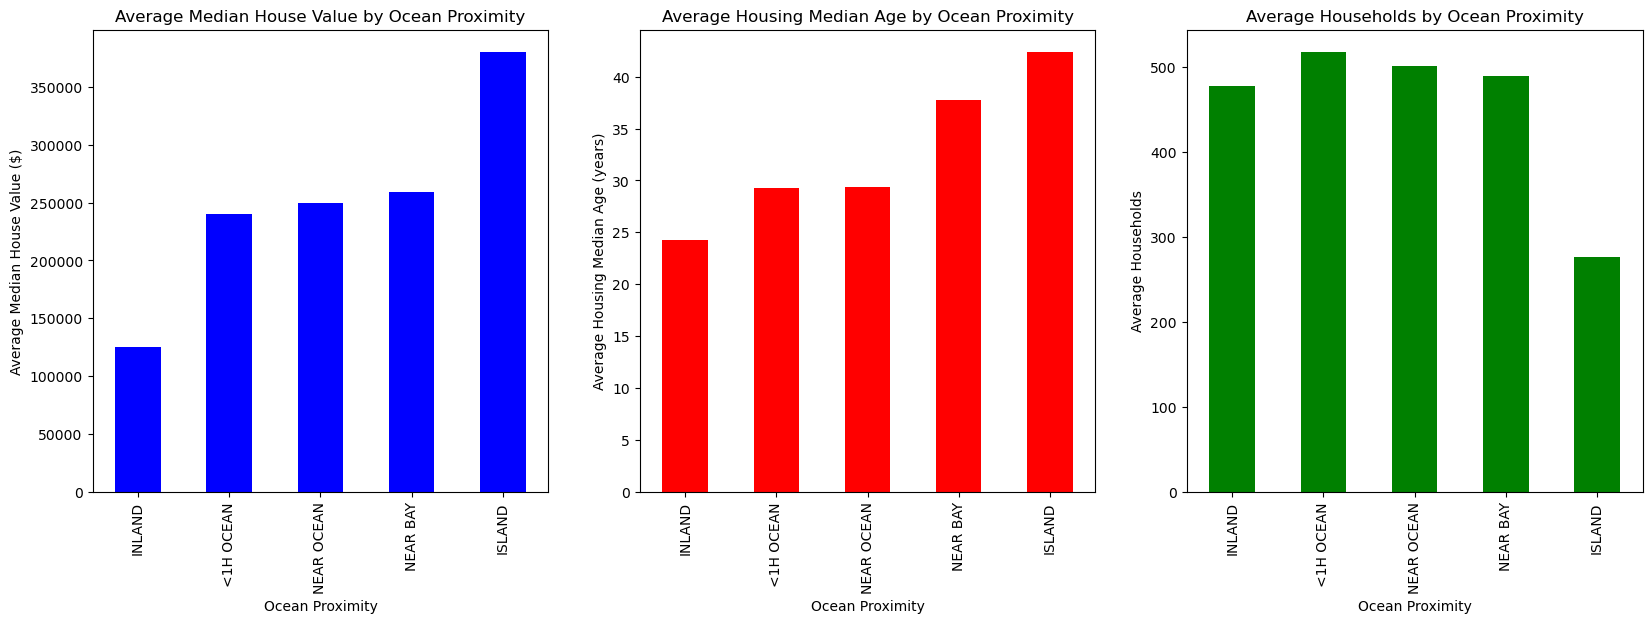

In [44]:
dataset_1 = housing_data[['median_house_value', 'housing_median_age', 'households', 'ocean_proximity']].groupby('ocean_proximity')[['median_house_value', 'housing_median_age', 'households']].mean().sort_values('median_house_value')

fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex=True)
dataset_1['median_house_value'].plot(kind='bar', ax=axs[0], color='blue', title='Average Median House Value by Ocean Proximity', xlabel='Ocean Proximity', ylabel='Average Median House Value ($)')
dataset_1['housing_median_age'].plot(kind='bar', ax=axs[1], color='red', title='Average Housing Median Age by Ocean Proximity', xlabel='Ocean Proximity', ylabel='Average Housing Median Age (years)')
dataset_1['households'].plot(kind='bar', ax=axs[2], color='green', title='Average Households by Ocean Proximity', xlabel='Ocean Proximity', ylabel='Average Households')
  
plt.show()

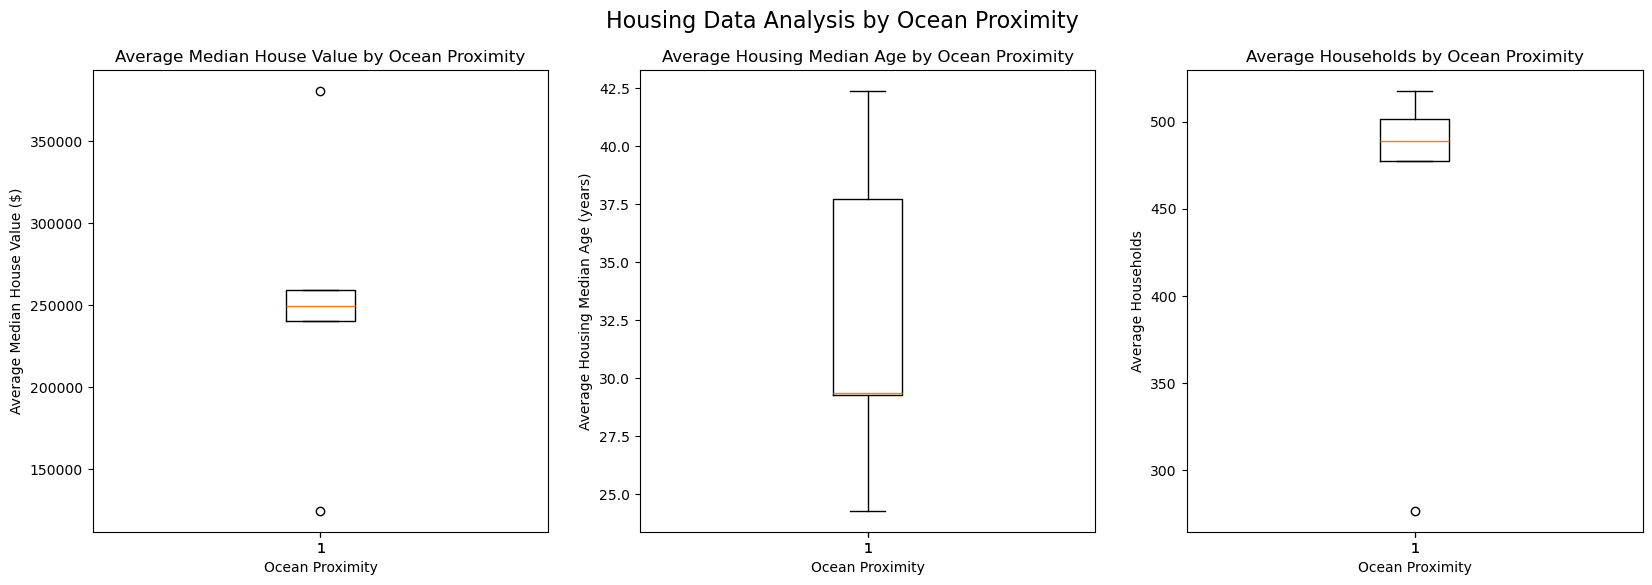

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex=True)
price_proximity_data = dataset_1.loc[:, ['median_house_value']]
price_proximity_x_data = price_proximity_data.index
price_proximity_y_data = price_proximity_data['median_house_value']

age_proximity_data = dataset_1.loc[:, ['housing_median_age']]
age_proximity_x_data = age_proximity_data.index     
age_proximity_y_data = age_proximity_data['housing_median_age'] 

household_proximity_data = dataset_1.loc[:, ['households']]
household_proximity_x_data = household_proximity_data.index
household_proximity_y_data = household_proximity_data['households']

axs[0].boxplot(price_proximity_y_data)
axs[0].set_title('Average Median House Value by Ocean Proximity')
axs[0].set_xlabel('Ocean Proximity')
axs[0].set_ylabel('Average Median House Value ($)')

axs[1].boxplot(age_proximity_y_data)
axs[1].set_title('Average Housing Median Age by Ocean Proximity')       
axs[1].set_xlabel('Ocean Proximity')
axs[1].set_ylabel('Average Housing Median Age (years)')

axs[2].boxplot(household_proximity_y_data)
axs[2].set_title('Average Households by Ocean Proximity')       
axs[2].set_xlabel('Ocean Proximity')
axs[2].set_ylabel('Average Households')    

fig.suptitle('Housing Data Analysis by Ocean Proximity', fontsize=16)
plt.show()


Lite tankar och summering:
Kan vara svårt att hitta intressepunkter i datan att jämföra med då man inte riktigt vet vad datan ska användas till. 
Och även vilka typer av diagram som man bör använda i olika typer av datan.

Sedan bör man nog bygga hjälpfunktioner för att t.ex ta fram olika data då jag ser att man skriver en del repetetioner i koden. Så även för plottningen.

Men väldigt roligt att försöka lära sig och det är ju fantastiska paket/bibliotek som vi tittat på i kursen.

Självutvärdering

1. Om det är något som känts utmanande i denna delkursen så skulle jag nog säga matematiken. Den är nog bra att fräsha upp för att förstå beräkningarna lite bättre även om mycket görs av Python. Jag tycker kursen fungerat väldigt bra för min del. Jag har kunnat jobba under tiden och det har varit en bra nivå på kunskapskontrollerna så jag har hunnit med att göra dom.

2. Jag tycker att borde klara minst ett G i denna kursen. Jag tycker jag förstått innehållet och tror kunskapskapskontroller jag lämnat in visar detta. Jag hoppas även jag klarar gränsen för ett VG dock.   

3. Tycker att Terese är en bra utbildare som håller en bra mix med föreläsning och sedan diskussioner både i mindre grupper och i helklass. Hoppas att detta upplägg fortsätter i nästa kurs också. Stort tack för en rolig och intressant första delkurs.